In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 11.5 MB/s 


In [3]:
%load_ext autotime
import pandas as pd
import numpy as np
# import pickle5 as pickle
import re

from tqdm.notebook import tqdm
tqdm.pandas()
import requests
# from pandarallel import pandarallel

# import hdbscan
# import imagehash
import spacy
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats

time: 10.3 s (started: 2022-12-01 15:59:10 +00:00)


# Main

In [4]:
my_dir = '/content/drive/MyDrive/Discord-Reddit/'

time: 501 µs (started: 2022-12-01 15:59:24 +00:00)


In [ ]:
clusters_info = merged_data[['cluster','cluster_label','proportion_of_reddit']].drop_duplicates().sort_values(by='cluster').reset_index(drop=True)

time: 19 ms (started: 2022-11-16 17:51:03 +00:00)


In [ ]:
clusters_info[clusters_info['cluster']==1]['proportion_of_reddit']

2    2.363636
Name: proportion_of_reddit, dtype: float64

time: 8.43 ms (started: 2022-11-16 17:52:46 +00:00)


In [5]:
def get_average_enthropy(df,base_x=2):
  
  df = df[df['cluster']!=-1]
  cluster_counts=df.groupby('cluster')['content'].count().to_dict()
  total_entropy = 0
  for cluster_x in cluster_counts:
    total_entropy = total_entropy + (cluster_counts[cluster_x] * scipy.stats.entropy(df[df['cluster']==cluster_x]['platform'].value_counts(), base=base_x))
  print(f'Average Entropy is {total_entropy/len(df)}\n')  


time: 1.35 ms (started: 2022-12-01 16:02:47 +00:00)


In [6]:
community_names = ['Ukrainian','Overwatch','europe','Rainbow6','ksi',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']
# community_names = ['Ukrainian']
for community_name in community_names:
  merged_data = pd.read_excel(my_dir+f'Datasets/Clustered_Data/{community_name}_clustered.xlsx')
  print(f'for {community_name}:')
  get_average_enthropy(merged_data, base_x=2)

for Ukrainian:
Average Entropy is 0.9130332252245261

for Overwatch:
Average Entropy is 0.5714640751356579

for europe:
Average Entropy is 0.7274588935116747

for Rainbow6:
Average Entropy is 0.7537314137067922

for ksi:
Average Entropy is 0.7125024967420182

for dankmemes:
Average Entropy is 0.7729069855240984

for Games:
Average Entropy is 0.5887472302716914

for kpop:
Average Entropy is 0.667746778781271

for music:
Average Entropy is 0.740062727805317

for rickandmorty:
Average Entropy is 0.7285683955318056

for Writingprompts:
Average Entropy is 0.4978690356954055

time: 51.4 s (started: 2022-12-01 16:03:42 +00:00)


In [7]:
merged_data = pd.read_excel(my_dir+f'Datasets/Clustered_Data/kpop_clustered.xlsx')

time: 3.36 s (started: 2022-12-01 16:10:36 +00:00)


In [9]:
merged_data#.drop_duplicates()

,Unnamed: 0,content,platform,cluster,cluster_label,proportion_of_reddit,USAS_Tags
0,95843,you just put on baby shark and go for it obvs,discord,90,dive_shark_arm_baby,0.000000,Z8mf A14 T3--- T1.3- N3.3--- M2 Q2.1 Q2.2 A1.1...
1,228546,oh shit i dont have this,discord,-1,gon_shit_people,0.518273,Z4 Z4 Z8mf A1.1.1 G2.2- X9.2+ E3- N5+ G2.1% Z5...
2,250907,!yt drunken tiger i hate myself,discord,146,m_tiger_lil_fuck,0.136364,PUNCT Z99 F2++ L2mfn Z8mf A5.4+ A5.4+
3,51769,"""oh ur lesbian its fine as long as u dont hit ...",discord,21,gay_gays,0.256250,PUNCT Z4 Z4 S3.2/S2.1f Z8 G2.1/I1.3 A13 T1.3+ ...
4,226921,damn rando doesn't get paid more for being goo...,discord,80,rando_rando_fuck,0.000000,Z4 Z99 A1.1.1 G2.2- X9.2+ E3- G2.1% Z5 Z6 A9+ ...
...,...,...,...,...,...,...,...
19707,37514,and fuck your seven years curse bitch! 🥳🥳🥳,reddit,48,cursed_sinb_faves_curse,0.230769,Z5 A5.4+ A5.4+ N1 T3 T1.2 T1.3 Q2.2 A1.4- A5.1...
19708,137262,oooh sexy angst 😉😭,reddit,-1,gon_shit_people,0.518273,Z1mf Z3c Z1mf Z3c Z1mf Z3c T1.3 T1.3
19709,194517,"god damn, every shot is on fire.",reddit,193,oozes_charisma_fire_shit,0.916667,Z1mf Z3c Z1mf Z3c PUNCT N5.1+ G3 G3/S2mf K5.1 ...
19710,231476,i loved isac too when it was reworked as an es...,reddit,-1,gon_shit_people,0.518273,Z8mf E2+ Z99 N5++ Z5 Z8 A3+ Z5 A2.1+ Z5 Z5 Z99...


time: 47.3 ms (started: 2022-12-01 16:10:54 +00:00)


In [ ]:
pd.read_excel(my_dir+f'Datasets/Clustered_Data/{community_name}_clustered.xlsx')

,Unnamed: 0,content,platform,cluster,cluster_label,proportion_of_reddit
0,8594,dolphins are more sadistic than sharks,discord,-1,know_shit_people_war,0.519687
1,183063,maybe they are as paid off as they are stupid,discord,-1,know_shit_people_war,0.519687
2,140780,ukraine just needs to way to smash russian arty,discord,469,going_ukraine_war,0.744417
3,153753,bro they’re so dumb do they not understand ukr...,discord,-1,know_shit_people_war,0.519687
4,285286,the wicked ones never die,discord,-1,know_shit_people_war,0.519687
...,...,...,...,...,...,...
58297,1280971,i don’t understand war i’ve been to war have y...,reddit,-1,know_shit_people_war,0.519687
58298,1533554,i'm not surprised this comes after that match ...,reddit,95,said_germany_people_war,0.654424
58299,2010808,your point being never did i claim they didn't...,reddit,-1,know_shit_people_war,0.519687
58300,11705,except the whack shit they do with their eyebrows,reddit,296,looks_face_guy,0.576471


time: 7.23 s (started: 2022-11-15 16:49:48 +00:00)


In [ ]:
clusters_info = merged_data[['cluster','cluster_label','proportion_of_reddit']].drop_duplicates().sort_values(by='cluster').reset_index(drop=True)

time: 31.3 ms (started: 2022-11-16 17:44:53 +00:00)


In [ ]:
clusters_info

,cluster,cluster_label,proportion_of_reddit
0,-1,got_game_people,0.512485
1,0,removed_rules_concerns_roverwatch,0.944444
2,1,flex_chelp_world_favor,0.363636
3,2,removed_rules_submission_concerns,1.000000
4,3,removed_rules_concerns_submission,1.000000
...,...,...,...
645,644,hope_pass_battle,0.965217
646,645,know_skins_beta,1.000000
647,646,want_skins_skin,0.923077
648,647,buy_boxes_loot,1.000000


time: 47.1 ms (started: 2022-11-16 18:54:00 +00:00)


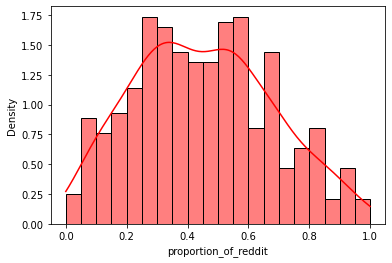

time: 251 ms (started: 2022-11-16 17:43:14 +00:00)


In [ ]:
sns.histplot(data=clusters_info, x='proportion_of_reddit', kde=True, stat='density',binwidth=0.05, color='red')

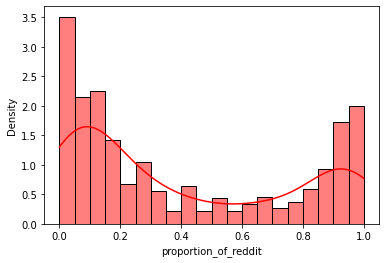

time: 599 ms (started: 2022-11-16 17:45:01 +00:00)


In [ ]:
sns.histplot(data=clusters_info, x='proportion_of_reddit', kde=True, stat='density',binwidth=0.05, color='red')

In [ ]:
scipy.stats.entropy([0.2,0.8], base=2)

0.7219280948873623

time: 6.32 ms (started: 2022-11-16 18:58:30 +00:00)


In [ ]:
scipy.stats.entropy(merged_data[merged_data['cluster']==150]['platform'].value_counts(),base=2)

0.6997722217733069

time: 9.39 ms (started: 2022-11-16 18:59:44 +00:00)


In [ ]:
merged_data[merged_data['cluster']==150]#['platform'].value_counts()

,Unnamed: 0,content,platform,cluster,cluster_label,proportion_of_reddit
129,997754,that is so gross that it back,discord,150,gross_disgusting_thing_people,0.189189
2575,169889,disgusting,discord,150,gross_disgusting_thing_people,0.189189
4551,631635,im disgust of my own,discord,150,gross_disgusting_thing_people,0.189189
5326,230127,that's so gross,discord,150,gross_disgusting_thing_people,0.189189
5839,733347,it is very gross but damn i love it,discord,150,gross_disgusting_thing_people,0.189189
6372,960530,dont be gross,discord,150,gross_disgusting_thing_people,0.189189
7133,312405,nauseating,discord,150,gross_disgusting_thing_people,0.189189
7516,1171210,you're disgusting,discord,150,gross_disgusting_thing_people,0.189189
7641,1693448,is the nastiest thing,discord,150,gross_disgusting_thing_people,0.189189
8026,339262,people are so disgusting,discord,150,gross_disgusting_thing_people,0.189189


time: 19.1 ms (started: 2022-11-16 18:06:15 +00:00)


In [ ]:
merged_data['content'][5]

'ty baby kitty tyrant'

time: 5.17 ms (started: 2022-10-21 15:30:37 +00:00)
